Book review data- text analysis EDA

Dataset link: https://datarepo.eng.ucsd.edu/mcauley_group/gdrive/googlelocal/#subsets

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import json
import gzip


In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
def readJSON(path, limit=50000):
    count = 0
    with gzip.open(path, 'rt', encoding='utf-8') as f:
        for line in f:
            if count < limit:
                yield json.loads(line)
                count += 1
            else:
                break

In [6]:
google_data = []
for l in readJSON('/home/jovyan/github-classroom/rady-msba/rsm-mgta453-assignment1-rsm-kraviprasad/Web mining/review-Alabama_10.json.gz'):
    google_data.append(l)
    
google_data[:5]

[{'user_id': '114043824230907811356',
  'name': 'Kanisha Mixon',
  'time': 1597168272670,
  'rating': 5,
  'text': 'Very Personable staff! Beautiful and clean environment. I will definitely become a regular customer!!',
  'pics': None,
  'resp': None,
  'gmap_id': '0x8862134e67ff5c87:0x38b5e2ae99cd1fcf'},
 {'user_id': '116009008420407071921',
  'name': 'Brandie Hodges',
  'time': 1609899039594,
  'rating': 5,
  'text': 'Best clothing intown',
  'pics': None,
  'resp': None,
  'gmap_id': '0x8862134e67ff5c87:0x38b5e2ae99cd1fcf'},
 {'user_id': '106239928178034609776',
  'name': 'Sharon King',
  'time': 1547235290843,
  'rating': 4,
  'text': None,
  'pics': None,
  'resp': None,
  'gmap_id': '0x8862134e67ff5c87:0x38b5e2ae99cd1fcf'},
 {'user_id': '104970056115801744726',
  'name': 'Veronica Pierce',
  'time': 1517709403534,
  'rating': 5,
  'text': None,
  'pics': None,
  'resp': None,
  'gmap_id': '0x8862134e67ff5c87:0x38b5e2ae99cd1fcf'},
 {'user_id': '110587471700525107383',
  'name': 'W

In [7]:
df = pd.DataFrame(google_data[:100000])
df.head()


,user_id,name,time,rating,text,pics,resp,gmap_id
0,114043824230907811356,Kanisha Mixon,1597168272670,5,Very Personable staff! Beautiful and clean env...,None,None,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf
1,116009008420407071921,Brandie Hodges,1609899039594,5,Best clothing intown,None,None,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf
2,106239928178034609776,Sharon King,1547235290843,4,None,None,None,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf
3,104970056115801744726,Veronica Pierce,1517709403534,5,None,None,None,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf
4,110587471700525107383,Whitney Waldon Collier,1535245718492,5,None,None,None,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf


In [8]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  50000 non-null  object
 1   name     50000 non-null  object
 2   time     50000 non-null  int64 
 3   rating   50000 non-null  int64 
 4   text     27714 non-null  object
 5   pics     994 non-null    object
 6   resp     7402 non-null   object
 7   gmap_id  50000 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.1+ MB
None
               time        rating
count  5.000000e+04  50000.000000
mean   1.560578e+12      4.367180
std    4.460526e+10      1.152678
min    1.260469e+12      1.000000
25%    1.529654e+12      4.000000
50%    1.562470e+12      5.000000
75%    1.598477e+12      5.000000
max    1.631149e+12      5.000000


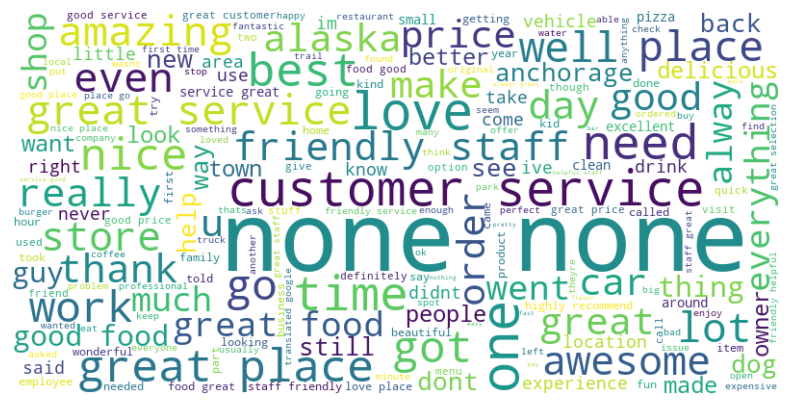

none        39436
great       17318
good        10922
place        9941
service      9294
food         7551
friendly     6806
staff        6783
nice         5527
always       4975
Name: count, dtype: int64

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

# Text Data Preprocessing

# Lowercasing, removing punctuation, and tokenization
df['processed_text'] = df['text'].astype(str).str.lower().str.replace('[^\w\s]', '', regex=True)

# Tokenization
df['tokens'] = df['processed_text'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Word frequency
all_words = [word for tokens in df['tokens'] for word in tokens]
freq_dist = pd.Series(all_words).value_counts()

# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Show the top 10 most frequent words
freq_dist.head(10)


In [ ]:
pip install textblob

In [64]:
from textblob import TextBlob

df['polarity'] = df['processed_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['processed_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


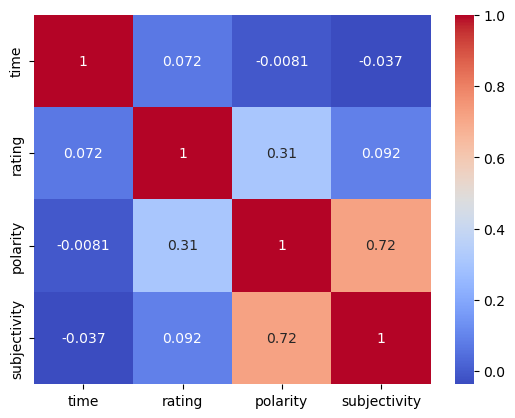

In [65]:
sns.heatmap(df.select_dtypes(exclude=['object']).corr(), annot=True, cmap='coolwarm')
plt.show()


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


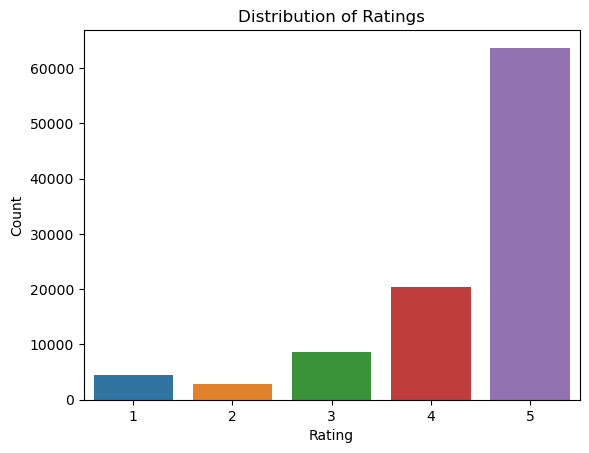

In [66]:
# Plotting the distribution of ratings
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [69]:
import datetime

# Convert Unix timestamp to datetime
df['datetime'] = pd.to_datetime(df['time'], unit='ms')

# Set datetime as the index for time series analysis
df.set_index('datetime', inplace=True)


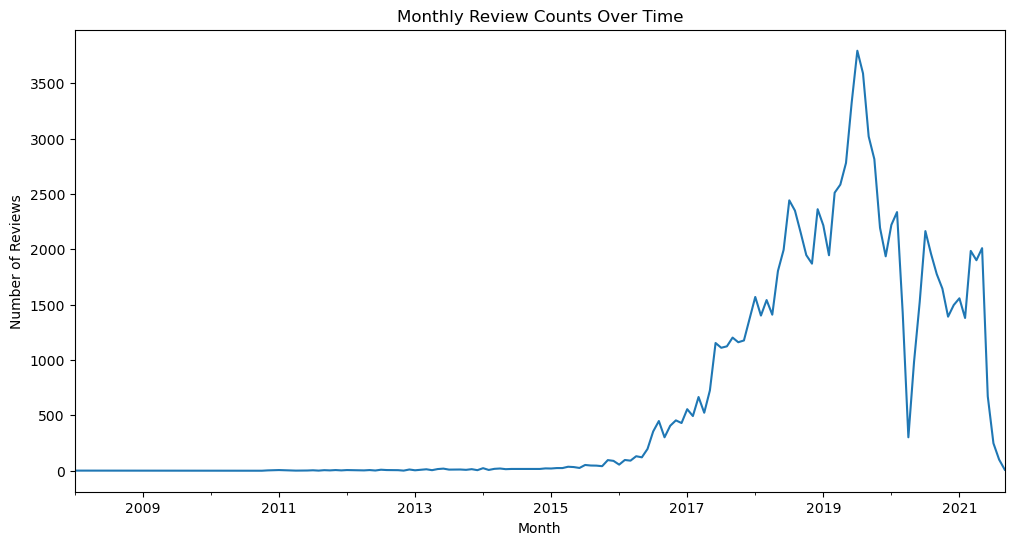

In [71]:
# Counting the number of reviews each month
monthly_review_count = df['rating'].resample('M').count()

# Plotting the monthly review counts
plt.figure(figsize=(12, 6))
monthly_review_count.plot()
plt.title('Monthly Review Counts Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()


Note:This is only part of the dataset


In [73]:
from nltk.util import ngrams

In [88]:
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

def generate_ngrams(text, n):
    # Check if the text is not None
    if text is not None:
        words = word_tokenize(text)
        n_grams = ngrams(words, n)
        return [' '.join(grams) for grams in n_grams]
    else:
        return []  # Return an empty list for None texts

# Applying the function to your DataFrame
# Replace 'your_text_column' with the name of your text column
df['bigrams'] = df['processed_text'].apply(lambda x: generate_ngrams(x, 2))

In [87]:
from gensim import corpora, models

# Prepare text for LDA
texts = [
    [word for word in document.lower().split()] 
    if document is not None else []  # Check for None and handle it
    for document in df['processed_text']
]

# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(texts)

# Create a corpus from the dictionary and bag-of-word document representations
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA model
lda = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print topics
topics = lda.print_topics(num_words=4)
for topic in topics:
    print(topic)


(0, '0.086*"and" + 0.053*"great" + 0.032*"good" + 0.031*"food"')
(1, '0.052*"best" + 0.047*"the" + 0.044*"in" + 0.042*"love"')
(2, '0.812*"none" + 0.004*"lake" + 0.003*"relaxing" + 0.003*"rock"')
(3, '0.053*"the" + 0.040*"a" + 0.037*"to" + 0.025*"you"')
(4, '0.041*"i" + 0.040*"the" + 0.039*"and" + 0.030*"to"')
